<a href="https://colab.research.google.com/github/pramendra/univ-ml2-lab1/blob/main/distribute_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Decision trees Regression and Bagging
### Univ.AI
### ML-2 Cohort-1


The goal of this lab is to predict the winner of the 2016 Presidential election (Trump vs. Clinton) in each county in the US, measured as 'votergap' = (trump - clinton) in percentage points. <br>
We do already know the answer to this now in 2021, but we intend to make a model to see how right or wrong our predictions are!

To do this, we consider several predictors and model a decision tree to perform regression and predict the dependent variable 'votergap'.
We then try to improve upon our simple Decision Tree model by implementing bagging.

In [81]:
#Import libraries
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix


In [3]:
! git init; git clone https://github.com/pramendra/univ-ml2-lab1

Initialized empty Git repository in /content/.git/
Cloning into 'univ-ml2-lab1'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 4), reused 11 (delta 2), pack-reused 0
Unpacking objects: 100% (16/16), done.


## Part 1:  Reading and Exploring the data

We will be using 'county_level_election.csv' to model the outcome of the 2016 presidential election from various predictors.

We start by reading in the datasets and visualizing the main predictors for now.

In [11]:
#your code here
data = pd.read_csv("./univ-ml2-lab1/data/county_level_election.csv")

In [13]:
data.head()

,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
0,Colorado,8117,Summit County,27239,15.173,4.918,45.996,2.5,68352,5.4,48.1,8.1,13.1,46.0,46.2,-27.632,31.530,59.162
1,Colorado,8037,Eagle County,53653,30.040,5.169,47.231,3.1,76661,10.1,47.3,9.4,11.8,31.0,47.1,-19.897,36.058,55.955
2,Idaho,16067,Minidoka County,19226,34.070,5.611,49.318,3.7,46332,24.1,11.8,18.3,34.2,80.0,61.8,54.148,71.135,16.987
3,Colorado,8113,San Miguel County,7558,10.154,4.747,46.808,3.7,59603,4.7,54.4,12.4,16.7,5.7,62.6,-44.769,23.892,68.662
4,Utah,49051,Wasatch County,21600,13.244,4.125,48.812,3.4,65207,9.5,34.4,13.9,23.0,257.8,68.3,25.357,50.471,25.114


In [57]:
data.iloc[2904]

state             Kentucky
fipscode             21141
county        Logan County
population           27174
hispanic             3.066
minority             9.424
female              51.007
unemployed             4.8
income               41150
nodegree              22.8
bachelor                13
inactivity            38.6
obesity               35.2
density               30.4
cancer               317.6
votergap            46.087
trump               71.364
clinton             25.278
Name: 2904, dtype: object

In [12]:
data.shape

(3066, 18)

Perform an 80-20 train-test split on the dataframe to get your training and test data. Take only the following features in 'X': 'population','hispanic','minority','female','unemployed','income','nodegree','bachelor','inactivity','obesity','density','cancer'

In [60]:
#Split 80/20 train-test
X = data[['population','hispanic','minority','female','unemployed','income','nodegree','bachelor','inactivity','obesity','density','cancer']]
y = data[['votergap']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

Consider 1 variable, say minority, and plot the relationship between minority and the dependent variable.

Also plot this on a log scale to see if we can visualize it easier.


Note: We chose minority as it has the highest correlation with our target variable, you can also see this by printing out the correlation matrix using `sns.heatmap()` <br>
Remember not to leak any data while calculating the correlation!

In [70]:
#Plot minorty vs votergap
new_data = X_train[['minority']].merge(y_train, right_index=True, left_index=True)

new_data

,minority,votergap
368,50.657,-41.976
1475,24.433,41.384
1735,4.065,50.339
921,5.568,-16.067
935,6.829,24.899
...,...,...
1146,15.459,-35.260
51,18.719,17.368
631,17.601,-15.243
828,6.465,8.056


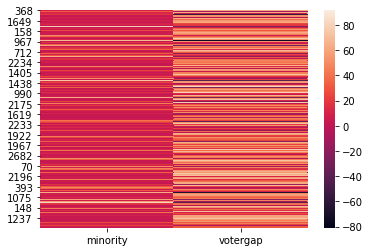

In [75]:
sns.heatmap(new_data)

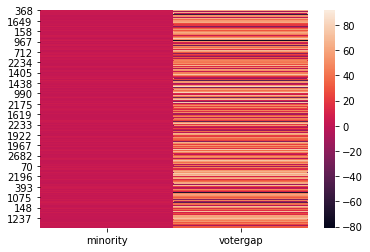

In [67]:
#Plot log(minorty) vs votergap
#your code here
new_data_log = np.log2(X_train[['minority']]).merge(y_train, right_index=True, left_index=True)
sns.heatmap(new_data_log)

## Part 2: Decision Trees

### 2.1: Fitting with 1 predictor

First, let us fit, visualize, and interpret a tree with 1 predictor - minority.

You will need to build a Decisition tree Regressor and plot their predictions of the training data with the actual train data as seen below.
![goodreadsexample](https://drive.google.com/uc?export=view&id=1iTuS6SdohXYSzGm8hJYf1m4W3en0hIOt)


As you can see from above, we have tried out various max_depth and min_samples_split. <br>
Feel free to play around with sklearns DecisionTreeRegressor functions parameters.

In [90]:
#your code here

dtree = DecisionTreeRegressor(max_depth=1, random_state=1)
dtree.fit(X_train[['minority']], y_train)
y_predicted_1 = dtree.predict(X_test[['minority']])



In [91]:
dtree = DecisionTreeRegressor(max_depth=2, random_state=1)
dtree.fit(X_train[['minority']], y_train)
y_predicted_2 = dtree.predict(X_test[['minority']])


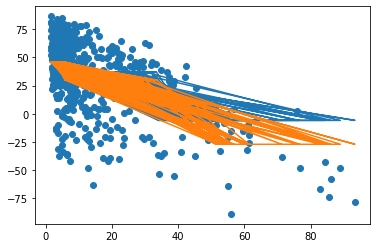

In [92]:
plt.scatter(X_test[['minority']], y_test)
plt.plot(X_test[['minority']], y_predicted_1)
plt.plot(X_test[['minority']], y_predicted_2)

ValueError: ignored

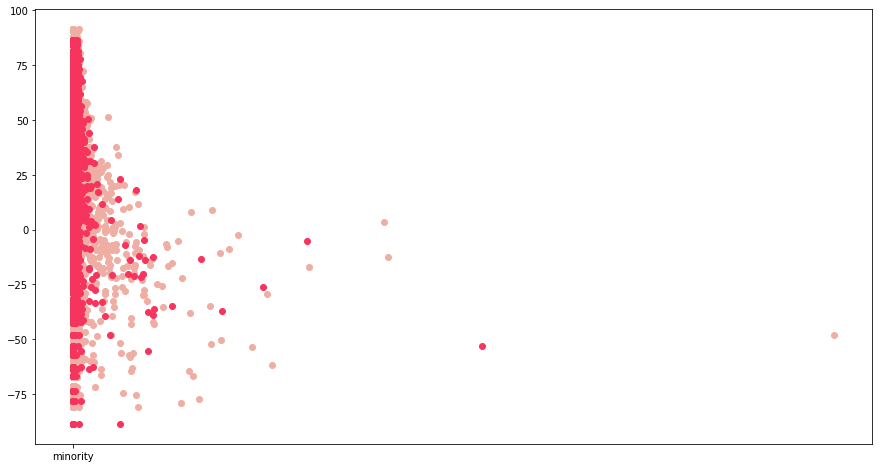

In [96]:
### edTest(test_depth) ###
#Decision tree model with varying max_depth
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(15,8))
#Plot xtrain vs ytrain and xtest vs ytest
plt.plot(X_train,y_train,'o',color='#EFAEA4', markersize=6, label="Train Data")
plt.plot(X_test,y_test,'o',color='#F6345E', markersize=6, label="Test Data")
# x_train = x_train.reshape(-1,1)
# x_test = x_test.reshape(-1,1)
X_train_min = X_train[['minority']]

train_mse=[]
test_mse=[]
depths=[1,2]
for i in depths:
    dtsin = DecisionTreeRegressor(max_depth=i)
    dtsin.fit(X_train_min, y_train)
    sort_x_train, sort_y_predtrain = zip(*sorted(zip(X_train_min, dtsin.predict(X_train_min))))
    plt.plot(sort_x_train, sort_y_predtrain, label=i)
    train_mse.append(mean_squared_error(y_train,dtsin.predict(X_train_min)))
    test_mse.append(mean_squared_error(y_test,dtsin.predict(X_test)))
plt.legend();

### 2.2: Fitting with all predictors

Now, use all the predictors to model the Decision Tree.

Print out the actual training set and their predictions and compare these values to see how well your model has done. Save this as a dataframe.

In [ ]:
#your code here



Perform 5-fold cross-validation to determine what the best max_depth would be for a single regression tree using your entire training set and GridSearchCV().

Next, visualize these results by plotting the mean CV score and +/- 2 standard deviations across the validation sets.<br>
To do this, you will need to store the training scores, mean and standard deviations of the test score.

Your plot should look something like this: 

![goodreadsexample](https://drive.google.com/uc?export=view&id=1iAJf3AGbiri8r6B0nrtbRIgxhkF1yGsR)


In [ ]:
depths = list(range(1, 21))

#your code here



In [ ]:
# plot means and shade the 2 SD interval

#your code here

Choose the best max_depth based on the result of your cross validation and build your final model with all predictors and the optimal max_depth.<br>
Also print out the mean accuracy on the train and test data using the `score()` method from the DecisionTreeRegressor class.

**You can add pruning or any other techniques you have learnt in the lectures till now.**

In [ ]:
#your code here


print("Train accuracy:")
print("Test accuracy:")

## Part 3: Bagging

You might still be overfitting in your previous model, we can now attempt to reduce the overfitting by implementing bagging. <br>
In this lab, we will be performing bagging for a decision tree modeled only on a single predictor as it is easier to visualize.

To do this, you will need to first bootstrap (resample data) and aggregate over all of the bootstrapped models. <br>
Plot your bagged models predictions in the training set along with the actual full training set to observe the predictions of your bagged models. <br>

Try implementing this without using sklearns `BaggingRegressor()`!

### 3.1: Bagging with 1 predictor

In [ ]:
#your code here



In [ ]:
#Plot the actual train data vs your bagged models predictions on the train data


### 3.2: Bagging with all predictors

Perform the same operations as you did above, except this time with all the predictors. 
In addition to this, calculate the average score of all of the individual trees and plot a histogram of the same. <br>
![goodreadsexample](https://drive.google.com/uc?export=view&id=1qBk8TMOygnIDmUCSzpkrrH7N0ulOrHSr)



Also print and calculate the score of the aggregated trees.

You need not plot the training set and their predictions as it gets harder to visualize so many dimensions.

In [ ]:
#your code here



In [ ]:
#Print and plot a histogram of the average R-squared score of all of the individual trees 
#your code here

#Print and calculate the R-squared score of the aggregated trees
#your code here


Question: What do you observe from the above histogram and the aAverage R-squared score of the individual trees and the R-squared score of the aggregated trees?

*Your answer here*